In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder

data_path = r'/content/drive/MyDrive/data'

#Function to read images, labels, and file names
def read_images_and_labels(folder_path):
    images = []
    labels = []
    filenames = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            img = Image.open(file_path)
            images.append(img)
            labels.append(label)
            filenames.append(file)
    return images, labels, filenames

train_images, train_labels, train_filenames = read_images_and_labels(os.path.join(data_path, 'train'))
test_images, test_labels, test_filenames = read_images_and_labels(os.path.join(data_path, 'test'))
valid_images, valid_labels, valid_filenames = read_images_and_labels(os.path.join(data_path, 'valid'))

train_df = pd.DataFrame({'Image': train_images, 'Label': train_labels, 'Filename': train_filenames})
test_df = pd.DataFrame({'Image': test_images, 'Label': test_labels, 'Filename': test_filenames})
valid_df = pd.DataFrame({'Image': valid_images, 'Label': valid_labels, 'Filename': valid_filenames})


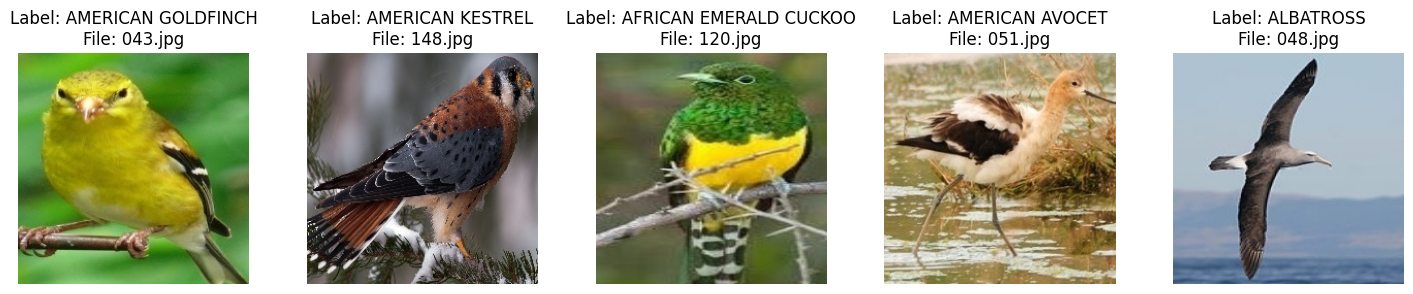

In [ ]:
import random
import matplotlib.pyplot as plt

#Displaying few random images
def display_random_images(images, labels, filenames, num_images=5):
    random_indices = random.sample(range(len(images)), num_images)
    fig, axes = plt.subplots(1, num_images, figsize=(18, 3))

    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(f"Label: {labels[idx]}\nFile: {filenames[idx]}")
        axes[i].axis('off')

    plt.show()

display_random_images(train_df['Image'], train_df['Label'], train_df['Filename'])

In [ ]:
train_class_counts = train_df['Label'].value_counts()
test_class_counts = test_df['Label'].value_counts()
valid_class_counts = valid_df['Label'].value_counts()

In [ ]:
train_class_counts

AFRICAN PIED HORNBILL         187
ABBOTTS BOOBY                 180
AMERICAN AVOCET               179
ABYSSINIAN GROUND HORNBILL    179
AFRICAN PYGMY GOOSE           179
AMERICAN BITTERN              170
ABBOTTS BABBLER               166
ALPINE CHOUGH                 166
AMERICAN KESTREL              165
ALEXANDRINE PARAKEET          165
AFRICAN EMERALD CUCKOO        164
AMERICAN FLAMINGO             164
ALBERTS TOWHEE                161
AMERICAN COOT                 158
AFRICAN OYSTER CATCHER        155
ALTAMIRA YELLOWTHROAT         150
AFRICAN FIREFINCH             137
AFRICAN CROWNED CRANE         137
AMERICAN GOLDFINCH            133
ALBATROSS                     133
Name: Label, dtype: int64

In [ ]:
test_class_counts

ALEXANDRINE PARAKEET          5
AMERICAN BITTERN              5
ABBOTTS BOOBY                 5
AFRICAN OYSTER CATCHER        5
AFRICAN EMERALD CUCKOO        5
ABBOTTS BABBLER               5
AFRICAN PIED HORNBILL         5
ALBATROSS                     5
AFRICAN PYGMY GOOSE           5
AFRICAN FIREFINCH             5
AFRICAN CROWNED CRANE         5
AMERICAN FLAMINGO             5
ALTAMIRA YELLOWTHROAT         5
AMERICAN COOT                 5
ALPINE CHOUGH                 5
AMERICAN GOLDFINCH            5
AMERICAN AVOCET               5
AMERICAN KESTREL              5
ALBERTS TOWHEE                5
ABYSSINIAN GROUND HORNBILL    5
Name: Label, dtype: int64

In [ ]:
valid_class_counts

ALTAMIRA YELLOWTHROAT         5
AMERICAN COOT                 5
AFRICAN CROWNED CRANE         5
ALBATROSS                     5
AFRICAN FIREFINCH             5
ABYSSINIAN GROUND HORNBILL    5
AFRICAN PYGMY GOOSE           5
ABBOTTS BOOBY                 5
AFRICAN PIED HORNBILL         5
ABBOTTS BABBLER               5
AFRICAN OYSTER CATCHER        5
ALEXANDRINE PARAKEET          5
AMERICAN AVOCET               5
AMERICAN BITTERN              5
ALBERTS TOWHEE                5
AMERICAN FLAMINGO             5
AMERICAN GOLDFINCH            5
ALPINE CHOUGH                 5
AMERICAN KESTREL              5
AFRICAN EMERALD CUCKOO        5
Name: Label, dtype: int64

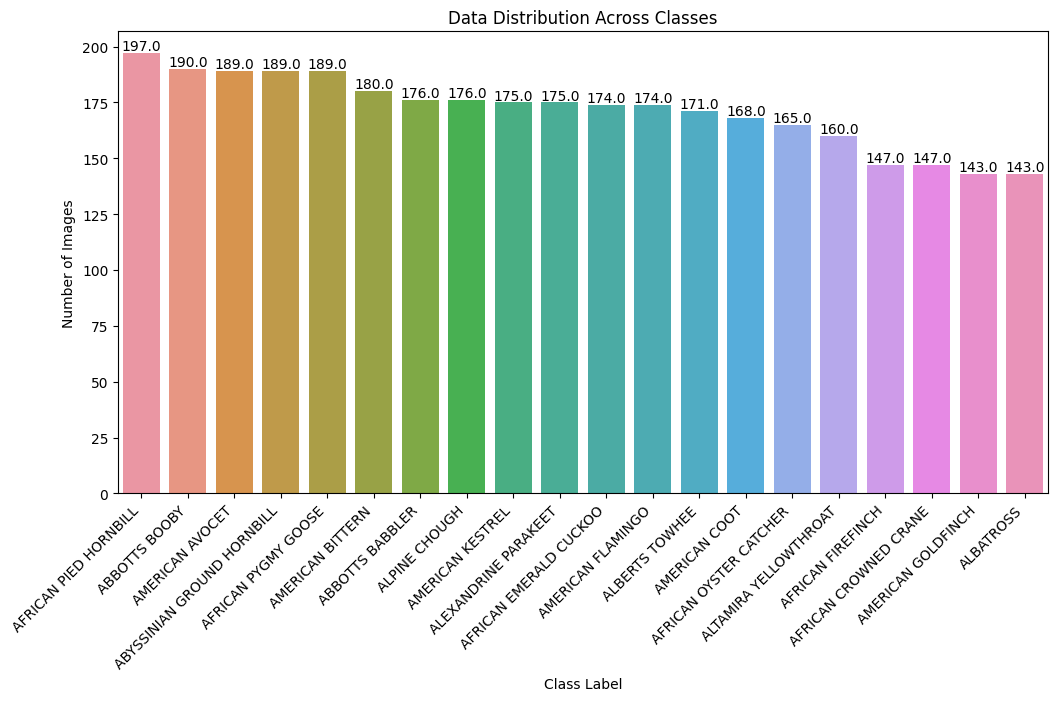

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

all_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Label', data=all_df, order=all_df['Label'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Data Distribution Across Classes')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

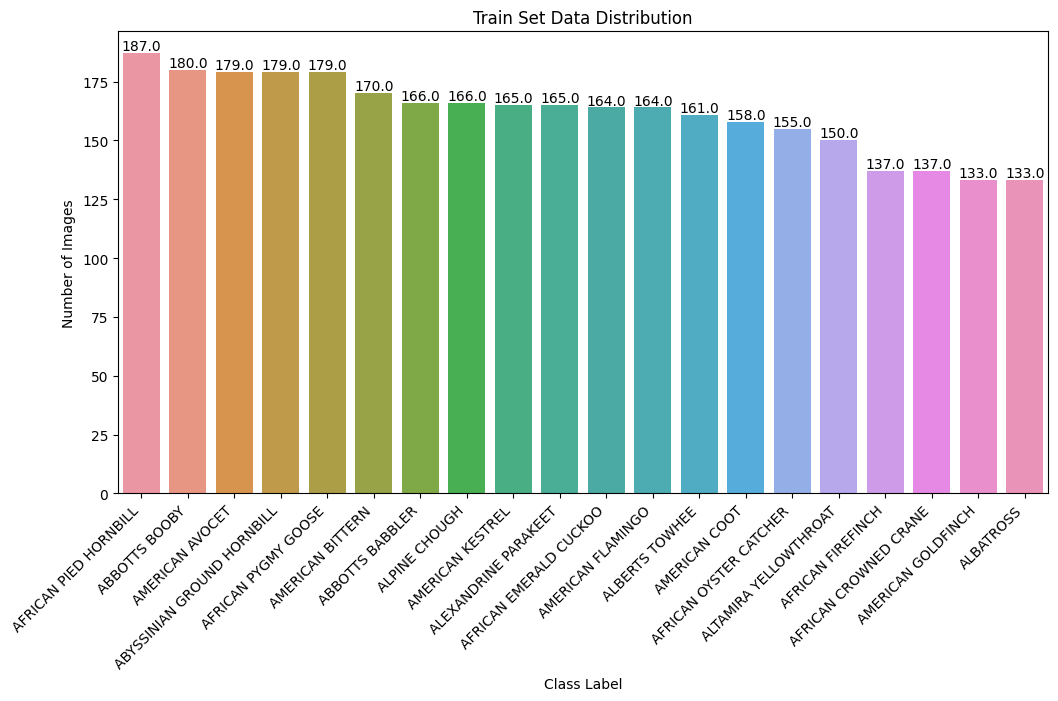

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Label', data=train_df, order=train_df['Label'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Train Set Data Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

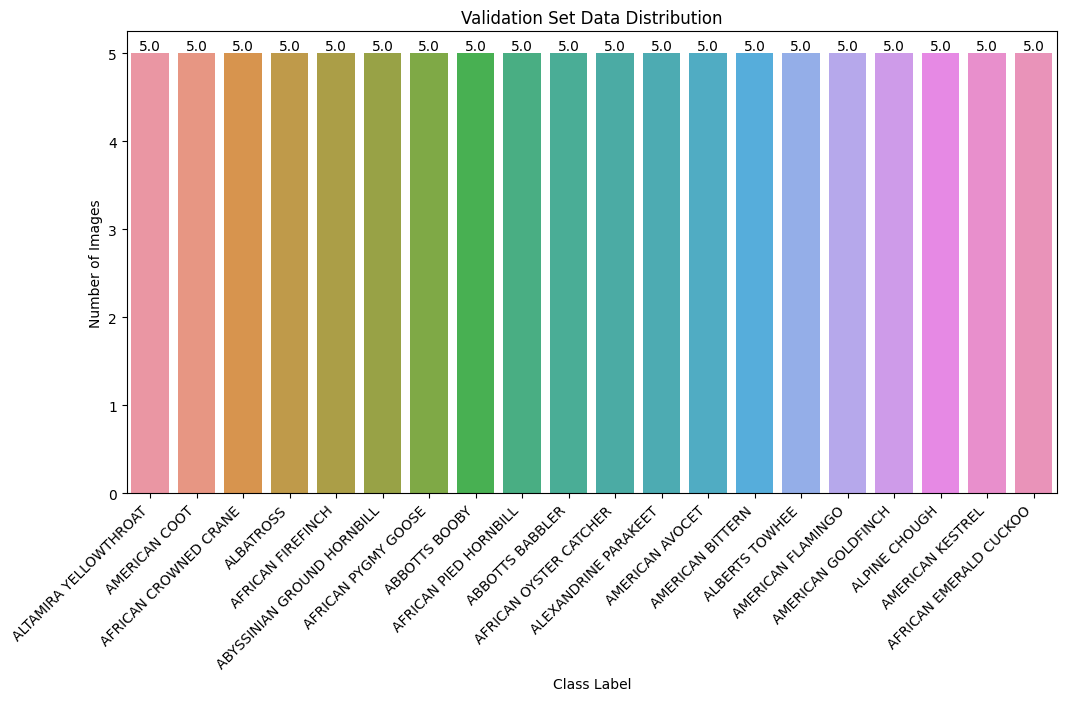

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Label', data=valid_df, order=valid_df['Label'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Validation Set Data Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()


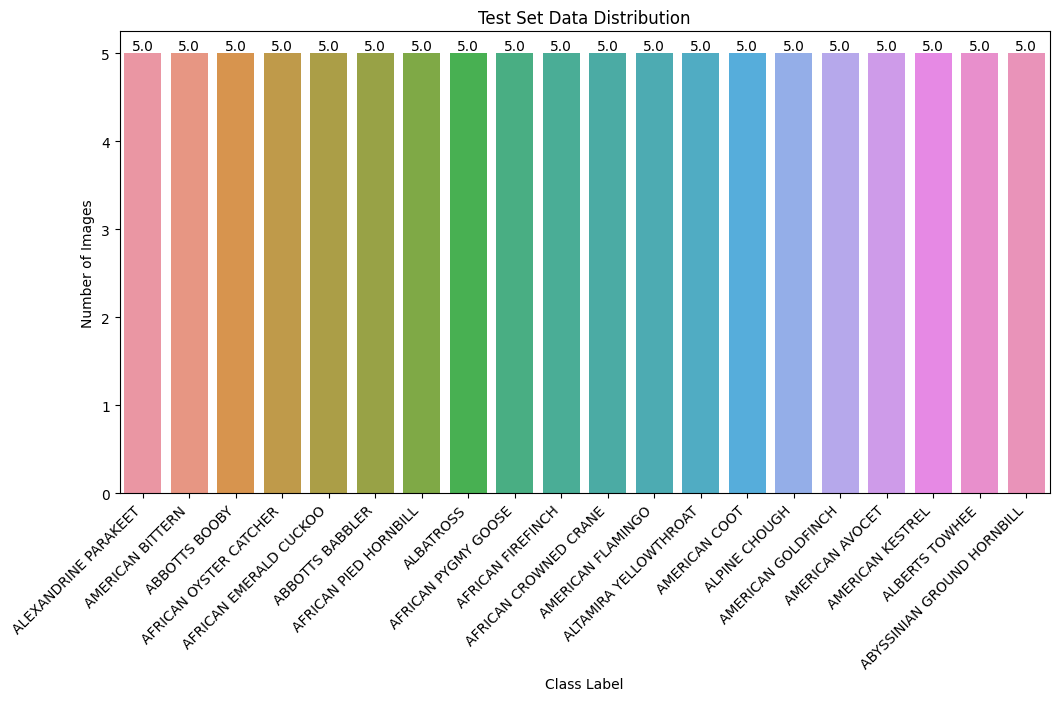

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Label', data=test_df, order=test_df['Label'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Test Set Data Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
train_dataset_path = "/content/drive/MyDrive/data/train"

transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.0))
])

for class_folder in os.listdir(train_dataset_path):
    class_folder_path = os.path.join(train_dataset_path, class_folder)

    augmented_image_paths = []

    for image_name in os.listdir(class_folder_path):
        image_path = os.path.join(class_folder_path, image_name)
        image = Image.open(image_path)

        augmented_image = transform(image)
        augmented_image_name = f"augmented_{image_name}"

        augmented_image_path = os.path.join(class_folder_path, augmented_image_name)
        augmented_image.save(augmented_image_path)
        augmented_image_paths.append(augmented_image_path)

In [ ]:
train_images_aug, train_labels_aug, train_filenames_aug = read_images_and_labels(os.path.join(data_path, 'train'))
train_df_aug = pd.DataFrame({'Image': train_images_aug, 'Label': train_labels_aug, 'Filename': train_filenames_aug})

In [ ]:
train_class_counts_aug = train_df_aug['Label'].value_counts()
train_class_counts_aug

AFRICAN PIED HORNBILL         374
ABBOTTS BOOBY                 360
AMERICAN AVOCET               358
ABYSSINIAN GROUND HORNBILL    358
AFRICAN PYGMY GOOSE           358
AMERICAN BITTERN              340
ABBOTTS BABBLER               332
ALPINE CHOUGH                 332
AMERICAN KESTREL              330
ALEXANDRINE PARAKEET          330
AFRICAN EMERALD CUCKOO        328
AMERICAN FLAMINGO             328
ALBERTS TOWHEE                322
AMERICAN COOT                 316
AFRICAN OYSTER CATCHER        310
ALTAMIRA YELLOWTHROAT         300
AFRICAN FIREFINCH             274
AFRICAN CROWNED CRANE         274
AMERICAN GOLDFINCH            266
ALBATROSS                     266
Name: Label, dtype: int64

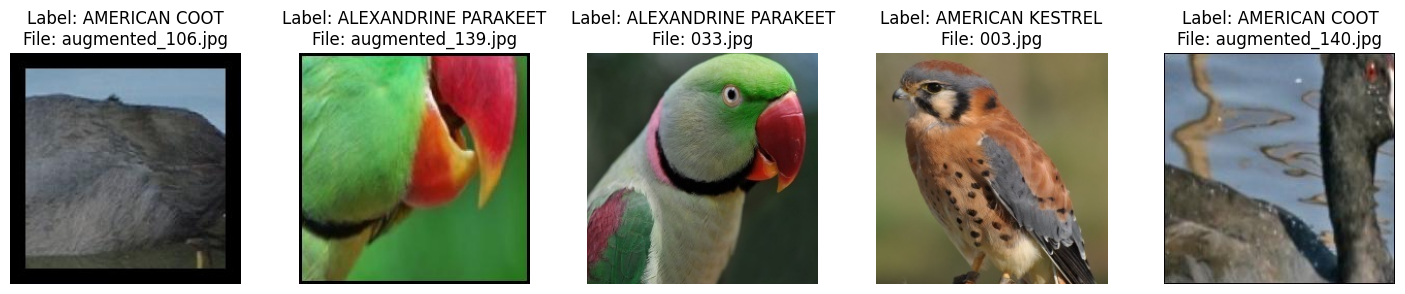

In [ ]:
display_random_images(train_df_aug['Image'], train_df_aug['Label'], train_df_aug['Filename'])

In [ ]:
import torch
from torchvision.transforms import v2 as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

train_dataset_path = "/content/drive/MyDrive/data/train"
valid_dataset_path = "/content/drive/MyDrive/data/valid"
test_dataset_path = "/content/drive/MyDrive/data/test"

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

class CustomImageFolder(ImageFolder):
    def __init__(self, root, transform=None, class_to_index=None):
        super(CustomImageFolder, self).__init__(root, transform=transform)
        self.class_to_index = class_to_index

    def __getitem__(self, index):
        path, target = self.samples[index]
        image = self.loader(path)
        if self.transform is not None:
            image = self.transform(image)

        label = self.class_to_index[self.classes[target]]

        return image, label

class_to_index = {
    'AFRICAN PIED HORNBILL': 0,
    'ABBOTTS BOOBY': 1,
    'ABYSSINIAN GROUND HORNBILL': 2,
    'AMERICAN AVOCET': 3,
    'AFRICAN PYGMY GOOSE': 4,
    'AMERICAN BITTERN': 5,
    'ABBOTTS BABBLER': 6,
    'ALPINE CHOUGH': 7,
    'ALEXANDRINE PARAKEET': 8,
    'AMERICAN FLAMINGO': 9,
    'ALBERTS TOWHEE': 10,
    'AMERICAN COOT': 11,
    'AFRICAN OYSTER CATCHER': 12,
    'AMERICAN KESTREL': 13,
    'AFRICAN EMERALD CUCKOO': 14,
    'ALTAMIRA YELLOWTHROAT': 15,
    'AFRICAN FIREFINCH': 16,
    'AFRICAN CROWNED CRANE': 17,
    'ALBATROSS': 18,
    'AMERICAN GOLDFINCH': 19,
}

train_dataset = CustomImageFolder(train_dataset_path, transform=train_transforms, class_to_index=class_to_index)
valid_dataset = CustomImageFolder(valid_dataset_path, transform=valid_transforms, class_to_index=class_to_index)
test_dataset = CustomImageFolder(test_dataset_path, transform=test_transforms, class_to_index=class_to_index)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        #Convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        #Fully connected layers
        self.fc1 = nn.Linear(256 * 28 * 28, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))

        x = x.view(x.size(0), -1)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)

        return x

num_classes = len(class_to_index)
cnn_model = SimpleCNN(num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model = cnn_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.00007)

#training loop
num_epochs = 10
for epoch in range(num_epochs):
    cnn_model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    #validation loop
    cnn_model.eval()
    total_val = 0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Validation'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = cnn_model(inputs)
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    val_accuracy = correct_val / total_val

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')

torch.save(cnn_model.state_dict(), 'CNN_model.pth')

cnn_model.eval()
total_test = 0
correct_test = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'Testing'):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = cnn_model(inputs)
        _, predicted1 = outputs.max(1)
        total_test += labels.size(0)
        correct_test += predicted1.eq(labels).sum().item()


test_accuracy = correct_test / total_test
print('---------------------------------------------------------------------------------------')
print(f'Test Accuracy: {test_accuracy:.4f}')

Validation: 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]


Epoch 1/10, Training Loss: 2.4802, Training Accuracy: 0.2319, Validation Accuracy: 0.4400


Validation: 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]


Epoch 2/10, Training Loss: 1.7099, Training Accuracy: 0.4875, Validation Accuracy: 0.6700


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]


Epoch 3/10, Training Loss: 1.3609, Training Accuracy: 0.5954, Validation Accuracy: 0.7200


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]


Epoch 4/10, Training Loss: 1.1134, Training Accuracy: 0.6688, Validation Accuracy: 0.8100


Validation: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


Epoch 5/10, Training Loss: 0.8875, Training Accuracy: 0.7433, Validation Accuracy: 0.7800


Validation: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]


Epoch 6/10, Training Loss: 0.6999, Training Accuracy: 0.7912, Validation Accuracy: 0.8100


Validation: 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]


Epoch 7/10, Training Loss: 0.5042, Training Accuracy: 0.8570, Validation Accuracy: 0.7500


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]


Epoch 8/10, Training Loss: 0.3518, Training Accuracy: 0.9049, Validation Accuracy: 0.7900


Validation: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]


Epoch 9/10, Training Loss: 0.2234, Training Accuracy: 0.9473, Validation Accuracy: 0.8300


Validation: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]


Epoch 10/10, Training Loss: 0.1467, Training Accuracy: 0.9706, Validation Accuracy: 0.8200


Testing: 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

---------------------------------------------------------------------------------------
Test Accuracy: 0.7800


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

class CustomResNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

num_classes = len(class_to_index)
resnet_model = CustomResNet(num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=0.000001)

num_epochs = 10
for epoch in range(num_epochs):
    resnet_model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    resnet_model.eval()
    total_val = 0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Validation'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = resnet_model(inputs)
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    val_accuracy = correct_val / total_val

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')

torch.save(resnet_model.state_dict(), 'resnet_model.pth')

resnet_model.eval()
total_test = 0
correct_test = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'Testing'):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = resnet_model(inputs)
        _, predicted2 = outputs.max(1)
        total_test += labels.size(0)
        correct_test += predicted2.eq(labels).sum().item()


test_accuracy = correct_test / total_test
print('---------------------------------------------------------------------------------------')
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]
Validation: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]


Epoch 1/10, Training Loss: 3.0789, Training Accuracy: 0.0536, Validation Accuracy: 0.1000


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]


Epoch 2/10, Training Loss: 2.8651, Training Accuracy: 0.0994, Validation Accuracy: 0.2100


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]


Epoch 3/10, Training Loss: 2.6606, Training Accuracy: 0.1859, Validation Accuracy: 0.3800


Validation: 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]


Epoch 4/10, Training Loss: 2.4673, Training Accuracy: 0.3047, Validation Accuracy: 0.5300


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]


Epoch 5/10, Training Loss: 2.2821, Training Accuracy: 0.4414, Validation Accuracy: 0.6500


Validation: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]


Epoch 6/10, Training Loss: 2.1025, Training Accuracy: 0.5638, Validation Accuracy: 0.7600


Validation: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]


Epoch 7/10, Training Loss: 1.9332, Training Accuracy: 0.6509, Validation Accuracy: 0.8500


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]


Epoch 8/10, Training Loss: 1.7727, Training Accuracy: 0.7159, Validation Accuracy: 0.8900


Validation: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]


Epoch 9/10, Training Loss: 1.6300, Training Accuracy: 0.7590, Validation Accuracy: 0.9600


Validation: 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]


Epoch 10/10, Training Loss: 1.5021, Training Accuracy: 0.7873, Validation Accuracy: 0.9800


Testing: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

---------------------------------------------------------------------------------------
Test Accuracy: 0.8900


In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, random_split

num_classes = len(train_dataset.classes)
densenet_model = models.densenet121(pretrained=True)
in_features = densenet_model.classifier.in_features
densenet_model.classifier = nn.Linear(in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
densenet_model = densenet_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(densenet_model.parameters(), lr=0.000001)

#Training loop
num_epochs = 15
for epoch in range(num_epochs):

    densenet_model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = densenet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    #Validation
    densenet_model.eval()
    total_val = 0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Validation'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = densenet_model(inputs)
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    val_accuracy = correct_val / total_val

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')

torch.save(densenet_model.state_dict(), 'densenet_model.pth')


#Testing loop
densenet_model.eval()
total_test = 0
correct_test = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'Testing'):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = densenet_model(inputs)
        _, predicted3 = outputs.max(1)
        total_test += labels.size(0)
        correct_test += predicted3.eq(labels).sum().item()


test_accuracy = correct_test / total_test
print('---------------------------------------------------------------------------------------')
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 115MB/s]
Validation: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


Epoch 1/15, Training Loss: 3.0339, Training Accuracy: 0.0646, Validation Accuracy: 0.0600


Validation: 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]


Epoch 2/15, Training Loss: 2.9110, Training Accuracy: 0.0974, Validation Accuracy: 0.0900


Validation: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]


Epoch 3/15, Training Loss: 2.7891, Training Accuracy: 0.1538, Validation Accuracy: 0.2000


Validation: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]


Epoch 4/15, Training Loss: 2.6707, Training Accuracy: 0.2421, Validation Accuracy: 0.3000


Validation: 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]


Epoch 5/15, Training Loss: 2.5532, Training Accuracy: 0.3346, Validation Accuracy: 0.4400


Validation: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]


Epoch 6/15, Training Loss: 2.4373, Training Accuracy: 0.4289, Validation Accuracy: 0.5800


Validation: 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]


Epoch 7/15, Training Loss: 2.3275, Training Accuracy: 0.5152, Validation Accuracy: 0.6600


Validation: 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]


Epoch 8/15, Training Loss: 2.2179, Training Accuracy: 0.5912, Validation Accuracy: 0.7400


Validation: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]


Epoch 9/15, Training Loss: 2.1119, Training Accuracy: 0.6543, Validation Accuracy: 0.7700


Validation: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]


Epoch 10/15, Training Loss: 2.0081, Training Accuracy: 0.7020, Validation Accuracy: 0.8400


Validation: 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]


Epoch 11/15, Training Loss: 1.9078, Training Accuracy: 0.7419, Validation Accuracy: 0.8700


Validation: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]


Epoch 12/15, Training Loss: 1.8111, Training Accuracy: 0.7735, Validation Accuracy: 0.8800


Validation: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]


Epoch 13/15, Training Loss: 1.7216, Training Accuracy: 0.7977, Validation Accuracy: 0.8900


Validation: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]


Epoch 14/15, Training Loss: 1.6379, Training Accuracy: 0.8140, Validation Accuracy: 0.9200


Validation: 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]


Epoch 15/15, Training Loss: 1.5520, Training Accuracy: 0.8309, Validation Accuracy: 0.9000


Testing: 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

---------------------------------------------------------------------------------------
Test Accuracy: 0.9200


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.7 MB/s eta 0:00:00


In [ ]:
import timm

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import vision_transformer
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

#vit_model = vision_transformer.vit_base_patch16_224(pretrained=True)
vit_model = timm.create_model("vit_base_patch16_224", pretrained=True)
num_classes = len(class_to_index)
vit_model.head = nn.Linear(in_features=vit_model.head.in_features, out_features=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model = vit_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit_model.parameters(), lr=0.0005)

# Training loop
num_epochs = 12
for epoch in range(num_epochs):
    # Training
    vit_model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = vit_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Validation
    vit_model.eval()
    total_val = 0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Validation'):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = vit_model(inputs)
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    val_accuracy = correct_val / total_val

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')

# Testing loop
vit_model.eval()
total_test = 0
correct_test = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'Testing'):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = vit_model(inputs)
        _, predicted4 = outputs.max(1)
        total_test += labels.size(0)
        correct_test += predicted4.eq(labels).sum().item()

test_accuracy = correct_test / total_test
print('---------------------------------------------------------------------------------------')
print(f'Test Accuracy: {test_accuracy:.4f}')

Validation: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


Epoch 1/12, Training Loss: 2.9648, Training Accuracy: 0.0923, Validation Accuracy: 0.2200


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


Epoch 2/12, Training Loss: 2.3795, Training Accuracy: 0.2288, Validation Accuracy: 0.3100


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]


Epoch 3/12, Training Loss: 1.8166, Training Accuracy: 0.4181, Validation Accuracy: 0.4700


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]


Epoch 4/12, Training Loss: 1.5329, Training Accuracy: 0.5074, Validation Accuracy: 0.5900


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


Epoch 5/12, Training Loss: 1.4064, Training Accuracy: 0.5507, Validation Accuracy: 0.5900


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


Epoch 6/12, Training Loss: 1.3105, Training Accuracy: 0.5745, Validation Accuracy: 0.6600


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]


Epoch 7/12, Training Loss: 1.2174, Training Accuracy: 0.6089, Validation Accuracy: 0.6400


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]


Epoch 8/12, Training Loss: 1.1218, Training Accuracy: 0.6475, Validation Accuracy: 0.6400


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]


Epoch 9/12, Training Loss: 1.0854, Training Accuracy: 0.6495, Validation Accuracy: 0.6300


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


Epoch 10/12, Training Loss: 1.0472, Training Accuracy: 0.6622, Validation Accuracy: 0.7500


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Epoch 11/12, Training Loss: 0.9825, Training Accuracy: 0.6871, Validation Accuracy: 0.6700


Validation: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]


Epoch 12/12, Training Loss: 0.9486, Training Accuracy: 0.6927, Validation Accuracy: 0.6900


Testing: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

---------------------------------------------------------------------------------------
Test Accuracy: 0.7400


In [ ]:
import numpy as np
from scipy.stats import mode

pred_cnn = []
pred_res = []
pred_den = []
pred_vit = []
all_ground_truth_labels = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f'Testing'):
        inputs, labels = inputs.to(device), labels.to(device)

        all_ground_truth_labels.append(labels)

        outputs_cnn = cnn_model(inputs)
        _, predicted1 = outputs_cnn.max(1)
        pred_cnn.extend(predicted1.cpu().numpy())

        outputs_res = resnet_model(inputs)
        _, predicted2 = outputs_res.max(1)
        pred_res.extend(predicted2.cpu().numpy())

        outputs_den = densenet_model(inputs)
        _, predicted3 = outputs_den.max(1)
        pred_den.extend(predicted3.cpu().numpy())

        outputs_vit = vit_model(inputs)
        _, predicted4 = outputs_vit.max(1)
        pred_vit.extend(predicted4.cpu().numpy())

pred_cnn = np.array(pred_cnn)
pred_res = np.array(pred_res)
pred_den = np.array(pred_den)
pred_vit = np.array(pred_vit)

ground_truth_labels = np.concatenate([labels.cpu().numpy() for labels in all_ground_truth_labels])

accuracy_cnn = np.mean(pred_cnn == ground_truth_labels)
accuracy_res = np.mean(pred_res == ground_truth_labels)
accuracy_den = np.mean(pred_den == ground_truth_labels)
accuracy_vit = np.mean(pred_vit == ground_truth_labels)

print(f"\nCNN Model Accuracy: {accuracy_cnn * 100:.2f}%")
print(f"ResNet Model Accuracy: {accuracy_res * 100:.2f}%")
print(f"DenseNet Model Accuracy: {accuracy_den * 100:.2f}%")
print(f"ViT Model Accuracy: {accuracy_vit * 100:.2f}%")

all_predictions = np.stack([pred_cnn, pred_res, pred_den], axis=1)

ensemble_predictions, _ = mode(all_predictions, axis=1)
ensemble_accuracy = np.mean(ensemble_predictions.flatten() == ground_truth_labels)

print(f"Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%")

Testing: 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]


CNN Model Accuracy: 78.00%
ResNet Model Accuracy: 89.00%
DenseNet Model Accuracy: 92.00%
ViT Model Accuracy: 74.00%
Ensemble Accuracy: 93.00%
